In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier  # there is DecisionTreeRegressor also
from sklearn.tree import plot_tree

In [7]:
df = pd.read_csv('processed.cleveland.data', header= None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']

In [10]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [12]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [13]:
# MISSING DATA IDENTIFY



In [14]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [15]:
# unique values in object datatype
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [16]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [17]:
df['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object

In [18]:
#DEAL WITH MISSING DATA
print(len(df.loc[(df.ca=='?') | (df.thal=='?')]))

6


In [19]:
#Classification trees sklearn do not support missing values
df.loc[(df.ca=='?') | (df.thal=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [20]:

df.shape

(303, 14)

In [21]:
len(df)

303

In [22]:
df.shape[0]

303

In [23]:
df.shape[1]

14

In [24]:
#remove rows with missing values

df2 = df.loc[(df.ca!='?') & (df.thal!='?')]
df2.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [25]:
len(df2.loc[(df.ca=='?') | (df.thal=='?')])

0

In [26]:
df2.shape

(297, 14)

In [27]:
df2.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [28]:
df2.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [29]:
# Dependent and independent Vaeriables: Features and Targets

In [30]:
X = df2.drop('hd',axis=1).copy()  # or df2.iloc[:.:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [31]:
y = df2['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [32]:
# One Hot Encoding

- age float

- sex catagory
 - 0 Male
 - 1 Female
 
- cp catagory
 - 1
 - 2
 - 3
 - 4
 
- resbp float

- chol float

- fbs catagory
 - 0 : >=120
 - 1 : <120
 
- restegc catagory
 - 1
 - 2
 - 3
 
- thalach float

- exang catagory
 - 0 no
 - 1 yes

- oldpeak float

- slope catagory
 - 1 upslopping
 - 2 flat
 - 3 downslope
 
- ca float

- thal catgory
 - 3
 - 6
 - 7

- hd

In [33]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [34]:
# scikit learn decision trees not support catagorical data 
# so use one hot encoding 

In [35]:
# check cp
X.cp.unique()

array([1., 4., 3., 2.])

In [36]:
# One Hot Encoding
# 1. get_dummies pandas : not persistant
# 2. ColumnTransformer() sklearn : convert df to array
# and loses col name but is persistant

In [37]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [38]:
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [39]:
# sex, cp, fbs, restegc, exang, slope, thal

In [40]:
X.sex.unique()

array([1., 0.])

In [41]:
X.fbs.unique()

array([1., 0.])

In [42]:
X.restecg.unique()

array([2., 0., 1.])

In [43]:
X.exang.unique()

array([0., 1.])

In [44]:
X.slope.unique()

array([3., 2., 1.])

In [45]:
X.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [46]:
# 1. col with more than 2 catagories

In [47]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'],drop_first=True)

#cp : 4 unique: 0 0 0 means the other value etc 

# for any dataset always check for catgorical cols
# that theu contain only accepetd values 
# and not just any random thing
# use unique()
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,False,False,False,False,True,False,True,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,False,True,False,True,True,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,True,False,False,False,True,False,False,False,False


In [48]:

# 2. Three col with 2 catgories : os and 1s
# do not to do anything for them
# use unique() to verify they contain 0 and 1 only

In [49]:
# ENCODING THE TARGET Y : HEART DISEASE
# contains 5 different values : severeness of heart disease
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [50]:
# as in this tutirial we will predict only if has disease or not
#  0 : does not have heart disease
# 1,2,3,4: have heart disease ====> 1

# get the index for each non zero value of y

y_nonZero = y>0
y[y_nonZero] = 1
y.unique()

array([0, 1], dtype=int64)

# Preliminary Classification Tree : 
### Without prunning

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)

# create a decison tree and fit train data
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

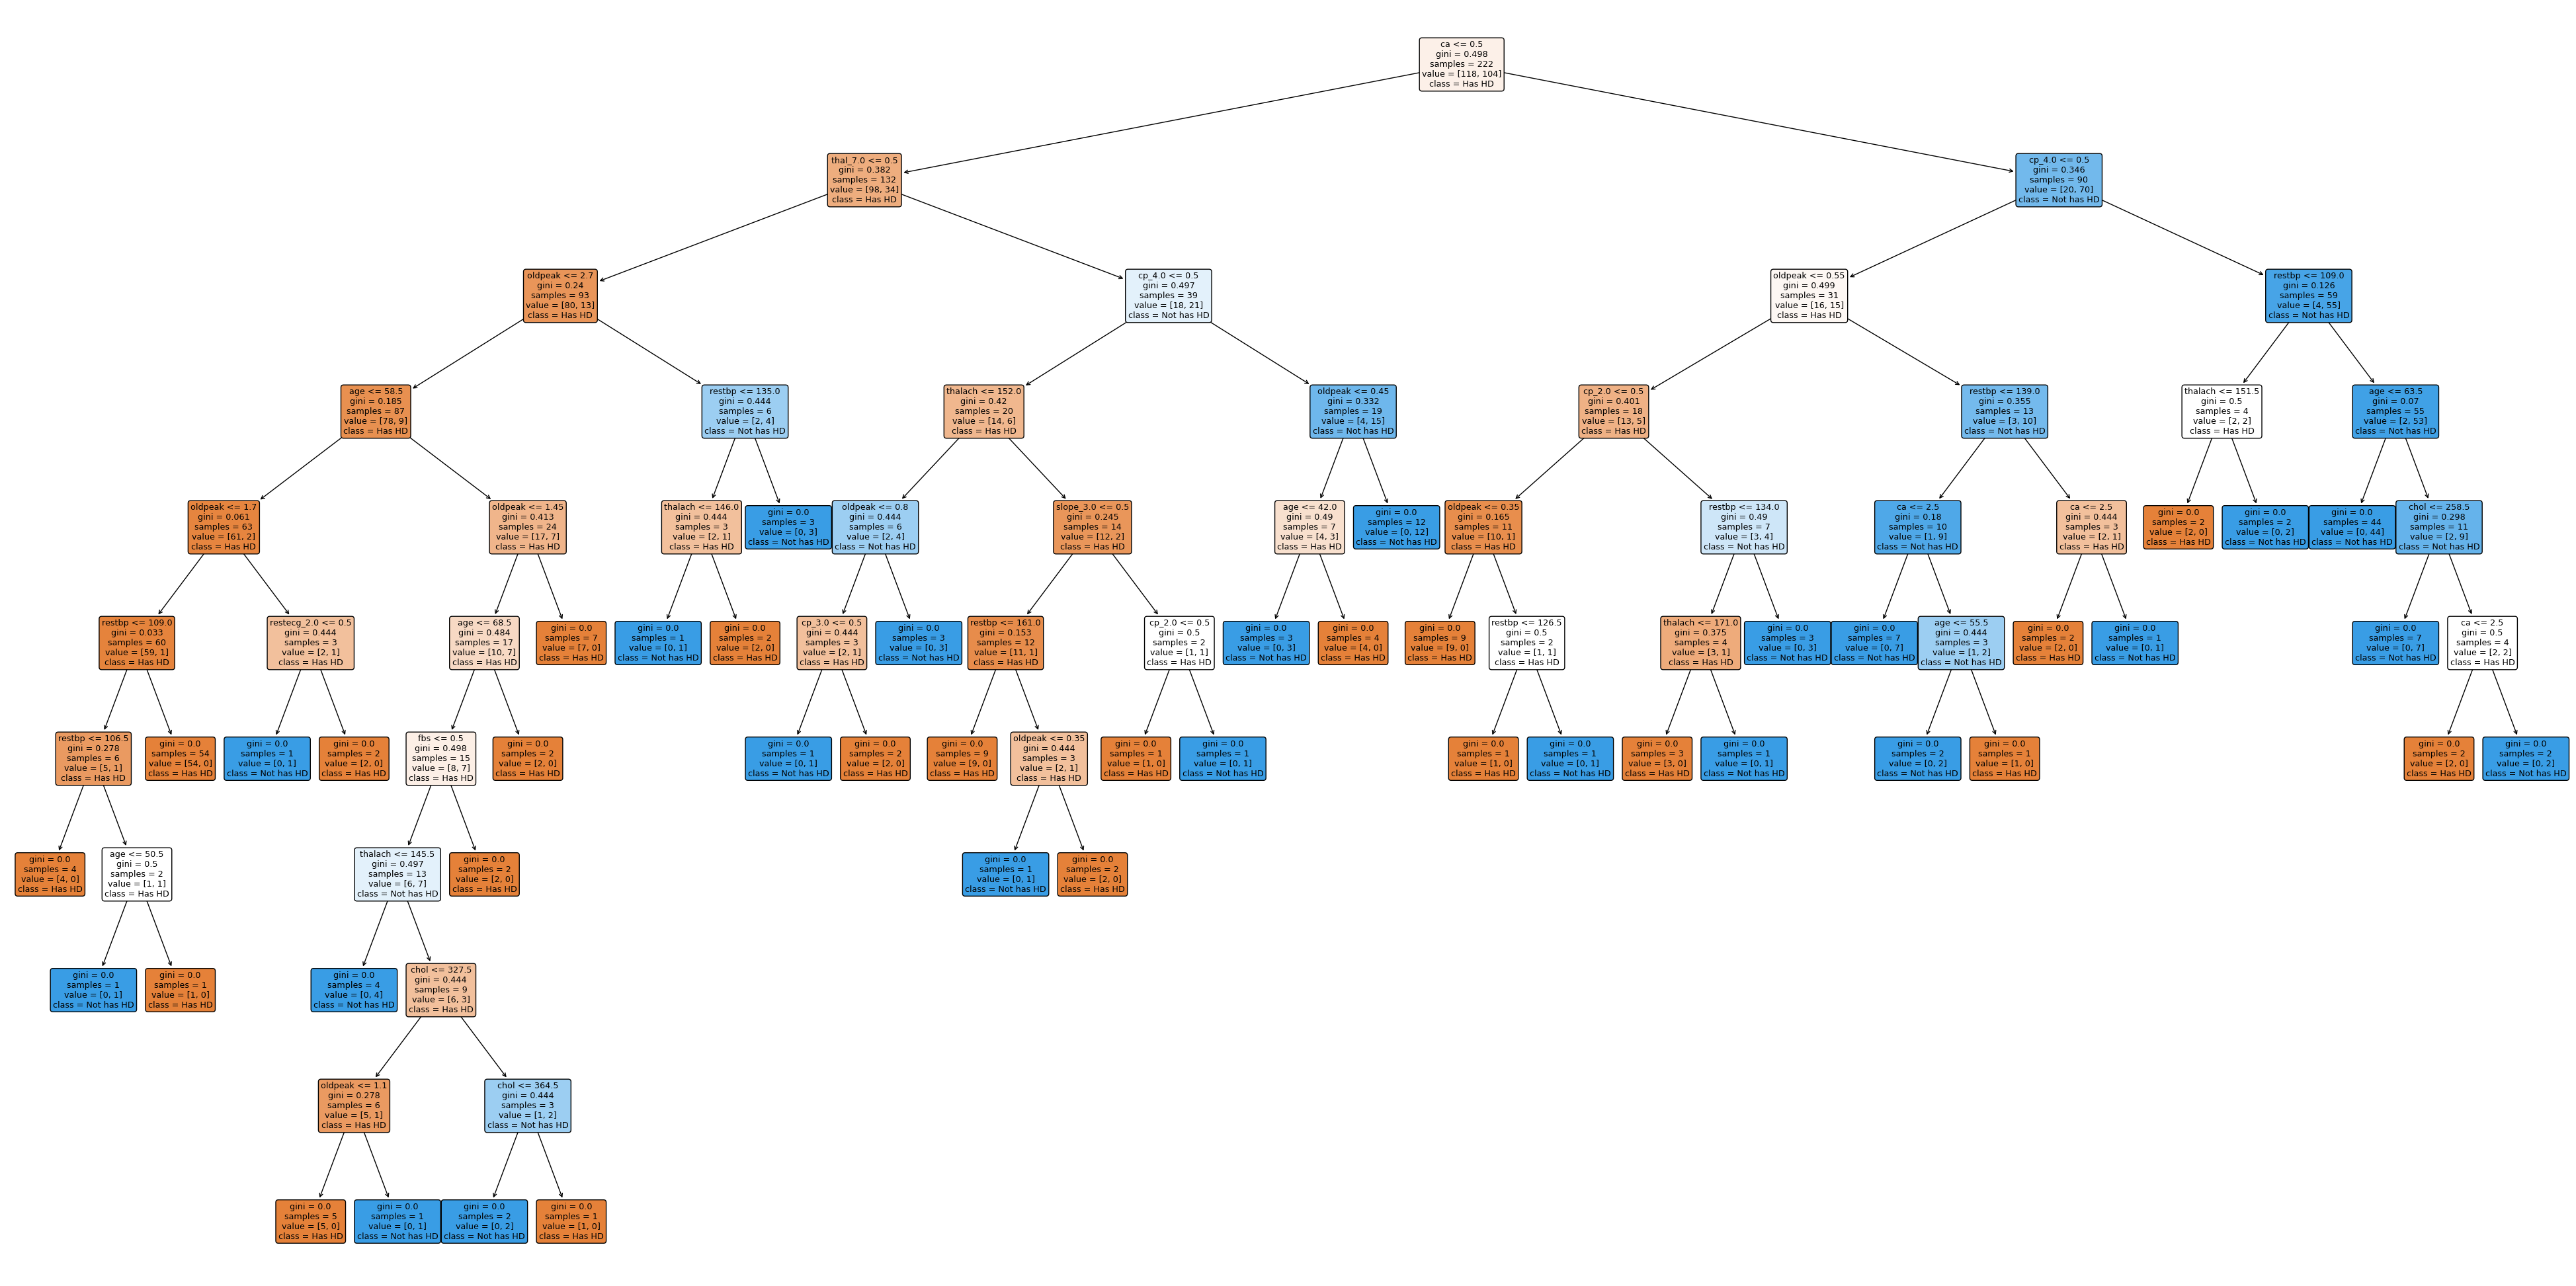

In [53]:
# plot the tree 
plt.figure(figsize=(50,25))

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['Has HD','Not has HD'],
          impurity=True,
          feature_names=X_encoded.columns.tolist());

In [55]:
# plot confusion matrix() will run the test data down the tree and
# draw the confusion matrux
from sklearn.metrics import confusion_matrix

y_pred = clf_dt.predict(X_test)
cmatrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n", cmatrix)



Confusion matrix: 
 [[31 11]
 [ 8 25]]


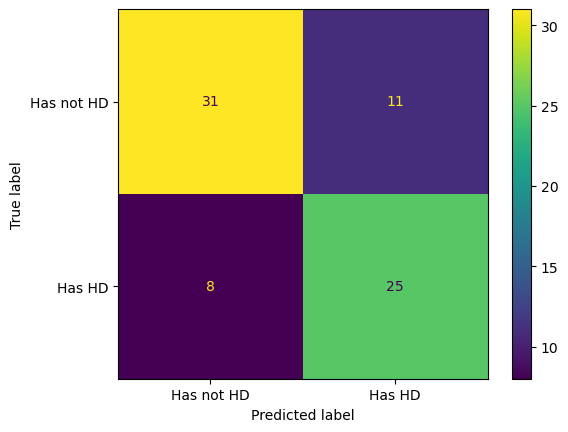

In [63]:
# ConfusionMatrixDisplay(clf_dt,
#                      X_test,
#                      y_test,
#                      display_labels=["Has not HD","Has HD"])

disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix,
                            display_labels=["Has not HD","Has HD"])
# print(disp)
disp.plot()
plt.show()

In [50]:
# can we do better
# is it overfitting


## Cost Complexity Prunning : Visualizing alpha

In [51]:
# exlpore other than scikit learn also : for very large datasets

In [64]:
# determine values for alpha for pur DT
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)

# Dictionary-like object, with the following attributes.
#     ccp_alphas : ndarray
#         Effective alphas of subtree during pruning.

# extract different values for alpha
ccp_alphas = path.ccp_alphas

# exclude max value of alpha otherwise it will prun all leaves
# and we will be left with just a root not a tree

ccp_alphas = ccp_alphas[:-1]

# in this array we will put our decision trees
clf_decTrees = []

# now create a DT per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_decTrees.append(clf_dt)

In [65]:
# len(clf_decTrees)
# plot_tree(clf_decTrees[2],feature_names=X_encoded.columns,
#          filled=True,
#          rounded = True,
#          class_names=["Diseased","Not Diseased"])

In [66]:
# i=0
# # while(i<len(ccp_alphas)):
# for clf_dt in clf_decTrees:
#     plot_tree(clf_dt,feature_names=X_encoded.columns,
#          filled=True,
#          rounded = True,
#          class_names=["Diseased","Not Diseased"])


In [67]:
# accuracy of training and test

train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_decTrees]

test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_decTrees]

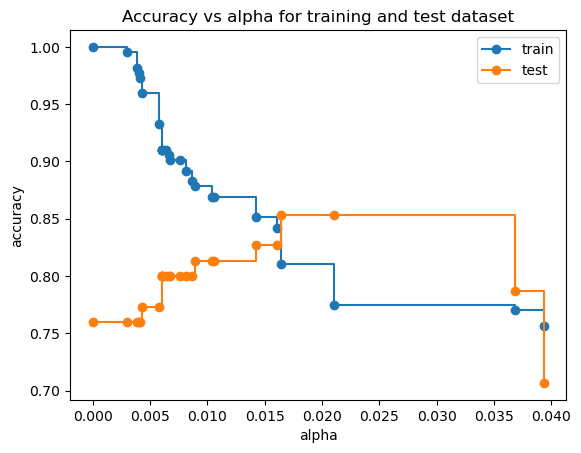

In [68]:
# plot accuracy vs alpha for training and test

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and test dataset")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

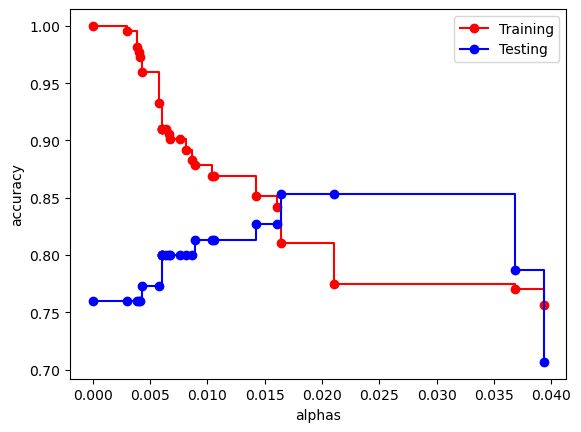

In [69]:
# plt.figure(figsize=(20,20))

# plt.plot(ccp_alphas,train_scores,color='r',marker='o',linestyle='-',label="Training",markersize=16,linewidth=3)
# plt.plot(ccp_alphas,test_scores,color='b',marker='o',linestyle='-', label="Testing",markersize=16,linewidth=3)

plt.plot(ccp_alphas,train_scores,color='r',marker='o',linestyle='-',label="Training",drawstyle="steps-post")
plt.plot(ccp_alphas,test_scores,color='b',marker='o',linestyle='-', label="Testing",drawstyle="steps-post")


plt.xlabel("alphas")
plt.ylabel("accuracy")
plt.legend()
plt.show()

#### as prunning increased accuracy for testing increased
#### good value of alpha = 0.016 here

## Cost Complexity Prunning : Cross Validation to find best alpha

   tree  accuracy
0     0  0.600000
1     1  0.866667
2     2  0.750000
3     3  0.772727
4     4  0.750000


<Axes: xlabel='tree'>

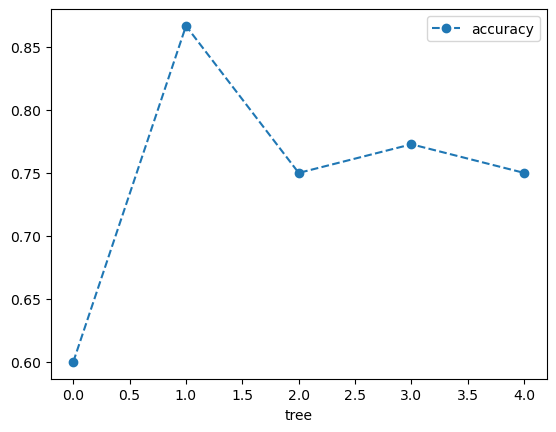

In [70]:
# create a TRee with ccp alpha = 0.016
# pehle eligible alpha se decision trees banye using training
# then testing ka score nikala unhi trees pr
# then best score dekha konse tree pr aaya
# us tree k corresponding alpha chose kar liya
# ab same alpha use krte hueek tree banao 
# alpha same rkhte hue cross validation karo
# different traning test pr different accuracy 
# ==> alpha sensitive to chosen datasets

clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=.016)
scores = cross_val_score(clf_dt,X_train,y_train,cv=5)

# return an array of score for each train test chosen 
# here data divided in 5 part one part is training oither is test
# and different for each validation 
# ex: train = 1st 20% or 2nd 20% etc
# cv to chose 5 fold or 10 fold etc cross validation

df = pd.DataFrame(data={"tree":range(5),"accuracy" : scores})
print(df.head())
df.plot(x='tree',y='accuracy',marker='o',linestyle = '--')

<Axes: xlabel='alpha'>

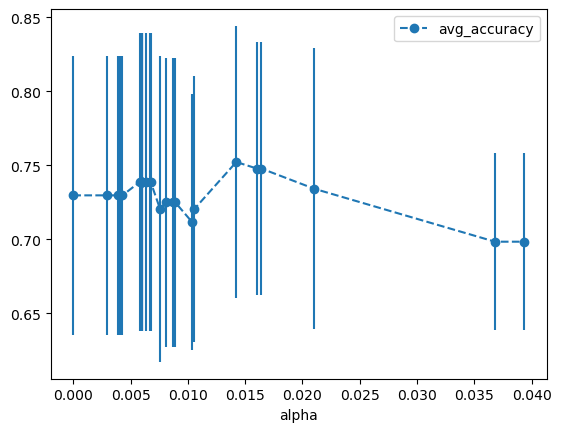

In [71]:
alpha_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_values.append({"alpha" : ccp_alpha, "avg_accuracy": np.mean(scores),"std_dev":np.std(scores)})
    
# cross val score returns array of accuracies or scores 
# of each training test split the cross validation made

alpha_results = pd.DataFrame(alpha_values)

alpha_results.plot(x='alpha',y='avg_accuracy',yerr='std_dev',marker='o',linestyle='--')

# yerr :  optional parameter and it contains the string value. xerr, yerr: These parameter contains an array. And the error array should have positive values.

In [72]:
# instead of 0.016 we can use 0.014 

alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha']<0.015)]

,alpha,avg_accuracy,std_dev
20,0.014225,0.752323,0.091956


In [73]:
# can use this alsoto get alpha with max avg accuracy
alpha_sorted = alpha_results.sort_values(by='avg_accuracy',ascending=False,ignore_index=True)
alpha_sorted.head()



# or 
# alpha_sorted = alpha_results.sort_values(by='avg_accuracy',ascending=False,ignore_index=True,inplace=True)


,alpha,avg_accuracy,std_dev
0,0.014225,0.752323,0.091956
1,0.016425,0.747879,0.085563
2,0.016041,0.747879,0.085563
3,0.006757,0.738788,0.100901
4,0.005788,0.738788,0.100901


In [74]:
ccp_alpha_ideal = alpha_sorted.loc[0,'alpha']

In [75]:
ccp_alpha_ideal

0.014224751066856332

In [76]:
ccp_alpha_ideal.dtype

dtype('float64')

### Now building, Evaluating, Drawing and interpreting the final classification Trees

Final confusion matrix : 
 [[34  8]
 [ 5 28]]


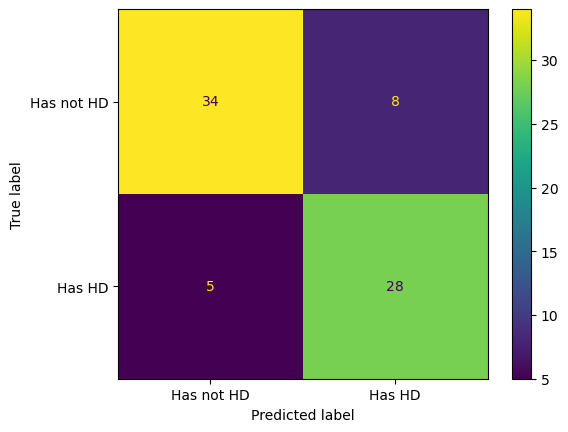

In [79]:
clf_dt_pruned = DecisionTreeClassifier(random_state=0,
                                       ccp_alpha=ccp_alpha_ideal)
clf_dt_pruned.fit(X_train,y_train)

y_pred_final = clf_dt_pruned.predict(X_test)

cmatrix_final = confusion_matrix(y_test,y_pred_final)

print("Final confusion matrix : \n", cmatrix_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix_final,
                            display_labels=["Has not HD","Has HD"])
# print(disp)
disp.plot()
plt.show()


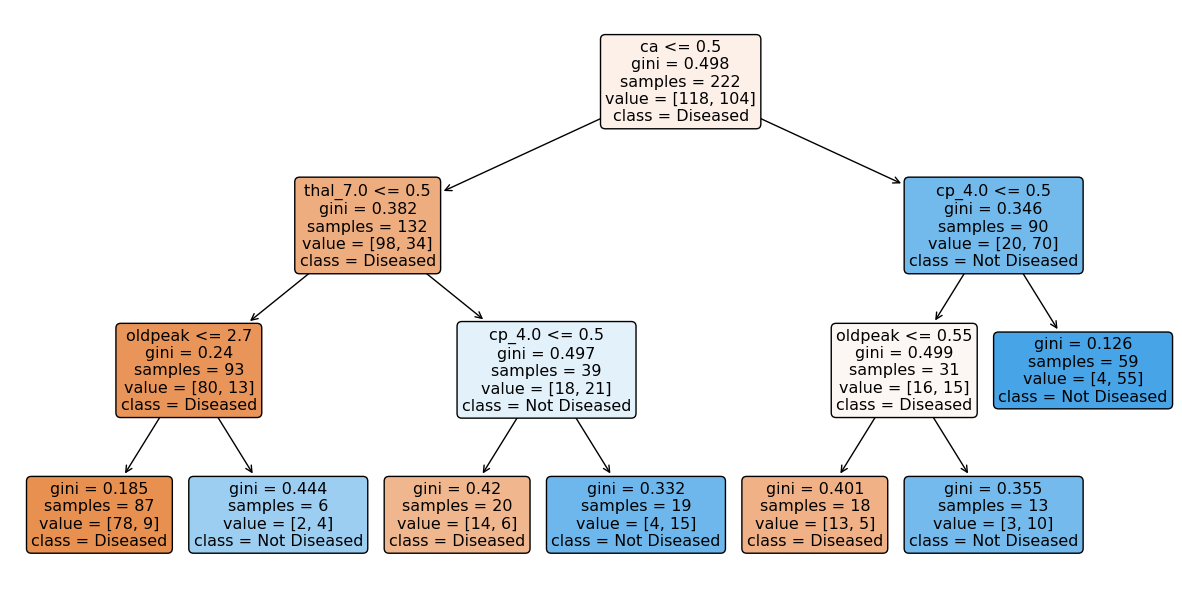

In [81]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,feature_names=X_encoded.columns.tolist(),
         filled=True,
         rounded = True,
         class_names=["Diseased","Not Diseased"])
plt.show()

# made on training data => now use to predict

In [82]:
X_encoded.shape

(297, 18)

In [83]:
X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,False,False,False,False,True,False,True,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,False,True,False,True,True,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,False,False,True,False,False,True,False,False,True
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,False,False,False,False,False,True,False,False,True
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,False,False,True,False,False,True,False,False,True
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,False,False,True,False,False,True,False,False,True


In [84]:
# how to know which features are the most influential'
# how is it decided how manyu random features
# will be used at each step of bootstrapping

- For classification, the measure of impurity is either the Gini impurity or the information gain/entropy.

- For regression the measure of impurity is variance.
- Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity.
- The more a feature decreases the impurity, the more important the feature is. 
- In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

- To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

## Feature selection using Random forest.



In [85]:
# see in ramdom forest code

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,ShuffleSplit,cross_val_score
from sklearn.metrics import classification_report

Final confusion matrix : 
 [[40  2]
 [ 6 27]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


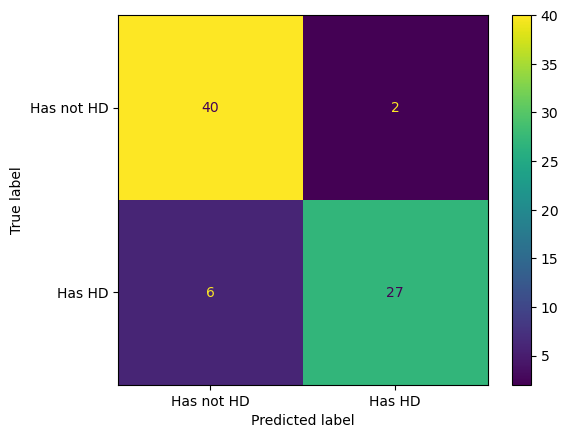

In [88]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

y_pred_lr = model_lr.predict(X_test)

cmatrix_lr = confusion_matrix(y_test,y_pred_lr)

print("Final confusion matrix : \n", cmatrix_lr)


disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix_lr,
                            display_labels=["Has not HD","Has HD"])
# print(disp)
disp.plot()
plt.show()

In [89]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.93      0.82      0.87        33

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.90      0.89      0.89        75



In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print('Accuracy: ', accuracy_score(y_test,y_pred_lr))
print(f'ROC-AUC Score: {roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1])}')

 

Accuracy:  0.8933333333333333
ROC-AUC Score: 0.9444444444444444


In [92]:
scores = cross_val_score(model_lr, X_train, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.73333333 0.88888889 0.77272727 0.79545455 0.84090909]
Average cross-validation score: 0.8062626262626263


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [93]:
print('Accuracy: ', accuracy_score(y_test,y_pred_final))
print(f'ROC-AUC Score: {roc_auc_score(y_test, clf_dt_pruned.predict_proba(X_test)[:, 1])}')


Accuracy:  0.8266666666666667
ROC-AUC Score: 0.9098124098124099


In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:

def find_best_model_randomserachcv(X,y):
    algos = {
        'logistic_regression' : {
            'model' : LogisticRegression(),
            'params': {
                'tol' : [0.00005,0.0001,0.0002,0.00025],
                'C' : [0.2,0.3,0.5,0.7,0.8,1],
                'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
        } ,
        
     'SVC' : {
         'model' : SVC(),
         'params' : {
             'kernel' : ["poly","rbf","sigmoid"],
             'gamma' : ['scale','auto'],
#              'probability' : True,
             'max_iter' : [1,10,50,100,200]
         }
     },
        
        'random_forest':{
            'model' : RandomForestClassifier(),
            'params' : {
                'criterion' : ["gini", "absolute_error", "poisson"],
                'min_samples_split' : [2,5,7,9,11,13],
                "max_depth"         : [3, 4, 5, 6, 8, 10, 12, 15],
                "min_impurity_decrease" : [ 0.0,0.1,0.2,0.3,0.4,0.5,0.6],
                "ccp_alpha" : [0.0,0.005,0.01,0.02,0.03,0.04,0.05]
                
            }            
        },
        
        

    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'],
                                 cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [96]:
from sklearn.svm import SVC

Final confusion matrix : 
 [[36  6]
 [21 12]]


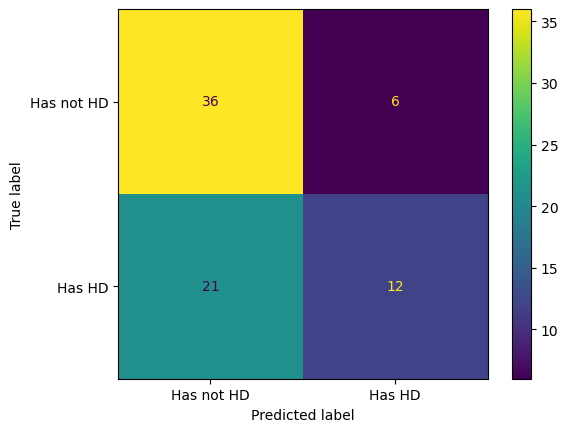

In [101]:
model_svm = SVC(probability=True)
model_svm.fit(X_train,y_train)

y_pred_svm = model_svm.predict(X_test)

cmatrix_svm = confusion_matrix(y_test,y_pred_svm)

print("Final confusion matrix : \n", cmatrix_svm)
# 
# plot_confusion_matrix(model_svm,X_test,y_test,
#                      display_labels=["Has not HD","Has HD"])

disp = ConfusionMatrixDisplay(cmatrix_svm,
                            display_labels=["Has not HD","Has HD"])
# print(disp)
disp.plot()
plt.show()

In [102]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        42
           1       0.67      0.36      0.47        33

    accuracy                           0.64        75
   macro avg       0.65      0.61      0.60        75
weighted avg       0.65      0.64      0.61        75



In [104]:
print('Accuracy: ', accuracy_score(y_test,y_pred_svm))
print(f'ROC-AUC Score: {roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])}')

 

Accuracy:  0.64
ROC-AUC Score: 0.7121212121212122


In [105]:
random_search = find_best_model_randomserachcv(X_train,y_train)

In [106]:
random_search.loc[0,'best_params']

{'tol': 0.0001, 'solver': 'lbfgs', 'C': 0.7}

In [107]:
random_search

,model,best_score,best_params
0,logistic_regression,0.826667,"{'tol': 0.0001, 'solver': 'lbfgs', 'C': 0.7}"
1,SVC,0.653333,"{'max_iter': 200, 'kernel': 'poly', 'gamma': '..."
2,random_forest,0.480000,"{'min_samples_split': 9, 'min_impurity_decreas..."


In [108]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.93      0.82      0.87        33

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.90      0.89      0.89        75



In [109]:
model = LogisticRegression(random_state=2022, tol = 0.00025, solver= 'liblinear', C = 0.8)

Final confusion matrix : 
 [[40  2]
 [ 6 27]]


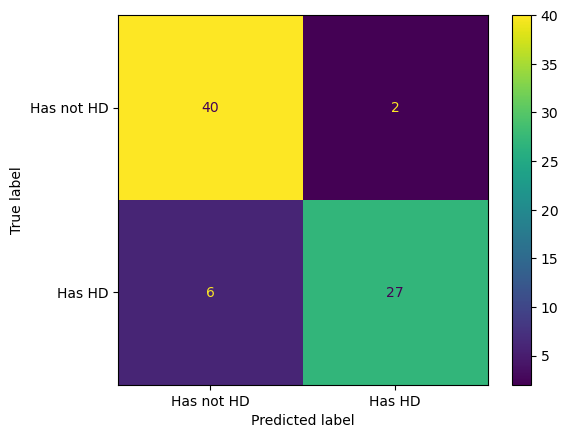

In [111]:
model.fit(X_train,y_train)

y_pred_fin = model.predict(X_test)

cmatrix_fin= confusion_matrix(y_test,y_pred_fin)

print("Final confusion matrix : \n", cmatrix_fin)

disp = ConfusionMatrixDisplay(cmatrix_fin,
                            display_labels=["Has not HD","Has HD"])
# print(disp)
disp.plot()
plt.show()

In [112]:
print(classification_report(y_test, y_pred_fin))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.93      0.82      0.87        33

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.90      0.89      0.89        75



In [113]:
print('Accuracy: ', accuracy_score(y_test,y_pred_fin))
print(f'ROC-AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}')

 

Accuracy:  0.8933333333333333
ROC-AUC Score: 0.9437229437229437


In [114]:
scores = cross_val_score(model, X_train, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.73333333 0.91111111 0.77272727 0.79545455 0.84090909]
Average cross-validation score: 0.8107070707070708
